In [1]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# 1.4 OS related
import os


# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline


In [2]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 1.6.1 For generating random numbers:
rng = default_rng()

In [4]:
# 2.0 Read already processed ad-data file 
#     This data was processed in github file


df_train = pd.read_csv("Back_order_train.csv")
df_test = pd.read_csv("Back_order_test.csv")

/Users/harshchauhan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df_train.head()
print("\n-----\n")
df_train.dtypes
print("\n------\n")
df_train.dtypes.value_counts()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,0
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,0
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0



-----



sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder      int64
dtype: object


------



float64    15
object      7
int64       1
dtype: int64

In [9]:
le = LabelEncoder()

In [10]:
df_train['went_on_backorder'] = le.fit_transform(df_train['went_on_backorder'])

In [11]:
df_train1 = df_train.dropna()


In [12]:
# 3.0 Select only numeric columns for the purpose
num_data = df_train.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape       # (1000, 11)
num_data.columns

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0,0


(1687861, 16)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'went_on_backorder'],
      dtype='object')

In [13]:
cols=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'went_on_backorder'] 

In [14]:
ss= StandardScaler()


In [15]:
nc = ss.fit_transform(num_data.loc[:,cols])


In [16]:
nc.shape     # (1000,9)



(1687861, 16)

In [17]:
nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder
0,-0.016752,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.04205,-0.008659,-3.469149,-3.581662,-0.018577,-0.082072
1,-0.016684,0.159826,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.04205,-0.008659,0.296052,0.287422,-0.018577,-0.082072


In [37]:
nc.head(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder
0,-0.016752,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.04205,-0.008659,-3.469149,-3.581662,-0.018577,-0.082072
1,-0.016684,0.159826,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.04205,-0.008659,0.296052,0.287422,-0.018577,-0.082072


In [18]:
nc['went_on_backorder'] = df_train['went_on_backorder']

<AxesSubplot:>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'national_inv'),
  Text(1, 0, 'lead_time'),
  Text(2, 0, 'in_transit_qty'),
  Text(3, 0, 'forecast_3_month'),
  Text(4, 0, 'forecast_6_month'),
  Text(5, 0, 'forecast_9_month'),
  Text(6, 0, 'sales_1_month'),
  Text(7, 0, 'sales_3_month'),
  Text(8, 0, 'sales_6_month'),
  Text(9, 0, 'sales_9_month'),
  Text(10, 0, 'min_bank'),
  Text(11, 0, 'pieces_past_due'),
  Text(12, 0, 'perf_6_month_avg'),
  Text(13, 0, 'perf_12_month_avg'),
  Text(14, 0, 'local_bo_qty')])

Text(0.5, 1.0, 'Parallel chart with random data')

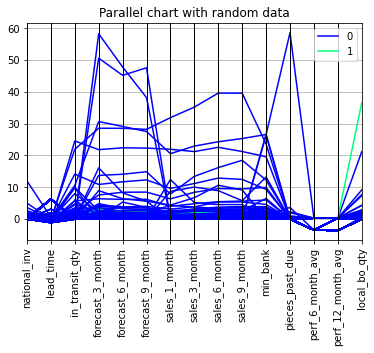

In [24]:
fig1 = plt.figure()
pd.plotting.parallel_coordinates(row1,
                                 'went_on_backorder',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

<AxesSubplot:>

Text(0.5, 1.0, 'Andrews plots with random data')

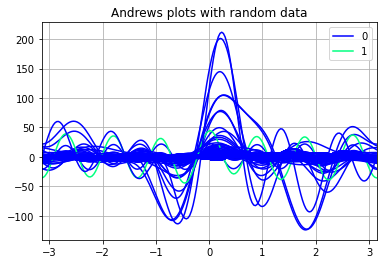

In [25]:
fig3 = plt.figure()
pd.plotting.andrews_curves(row1,
                           'went_on_backorder',
                           colormap = 'winter')

plt.title("Andrews plots with random data")


<AxesSubplot:>

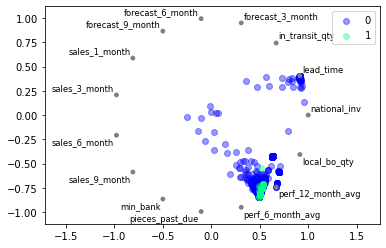

In [26]:
fig5 = plt.figure()
pd.plotting.radviz(row1,
                   class_column ='went_on_backorder',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

In [22]:
row1 = nc.sample(n = 10000)


In [23]:
row1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder
352367,-0.016617,0.018103,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,0.289650,0.278136,-0.018577,0
1609393,0.001246,-0.832235,-0.005997,0.124714,0.122103,0.137537,0.108430,0.124986,0.124441,0.112189,0.128470,-0.008659,0.296429,0.287422,-0.018577,0
677685,-0.016313,0.584994,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.041253,-0.008659,0.280613,0.271557,-0.018577,0
622561,-0.007230,-0.832235,0.129547,0.108599,0.092394,0.100399,0.174813,0.117860,0.101556,0.103563,0.116518,-0.008659,0.296429,0.286648,-0.018577,0
1593152,-0.016684,-0.832235,-0.032808,-0.033844,-0.034403,-0.034659,-0.028486,-0.033323,-0.035132,-0.034994,-0.042050,-0.008659,0.278730,0.269623,-0.018577,0


In [13]:
df_train.shape

(1687861, 23)

In [10]:
df_train1.shape

(1586967, 23)

In [11]:
df_train1 = df_train.dropna()


In [12]:
df_train1.isnull().sum()


sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [13]:
df_train1.nunique()

sku                  1586967
national_inv           14409
lead_time                 32
in_transit_qty          5201
forecast_3_month        7779
forecast_6_month       11037
forecast_9_month       13581
sales_1_month           5693
sales_3_month          10367
sales_6_month          14633
sales_9_month          18116
min_bank                5472
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             643
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [14]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586967 entries, 1 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1586967 non-null  object 
 1   national_inv       1586967 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1586967 non-null  float64
 4   forecast_3_month   1586967 non-null  float64
 5   forecast_6_month   1586967 non-null  float64
 6   forecast_9_month   1586967 non-null  float64
 7   sales_1_month      1586967 non-null  float64
 8   sales_3_month      1586967 non-null  float64
 9   sales_6_month      1586967 non-null  float64
 10  sales_9_month      1586967 non-null  float64
 11  min_bank           1586967 non-null  float64
 12  potential_issue    1586967 non-null  object 
 13  pieces_past_due    1586967 non-null  float64
 14  perf_6_month_avg   1586967 non-null  float64
 15  perf_12_month_avg  1586967 non-n

In [15]:
df_train1.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [16]:
cols=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty']



In [17]:
ss= StandardScaler()

In [18]:
nc = ss.fit_transform(num_data.loc[:,cols])

In [19]:
nc.shape

(1586967, 15)

In [20]:
nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.016004,0.159826,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.03639,-0.035919,-0.047544,-0.008926,0.151057,0.134829,-0.018939
1,-0.015840,0.018103,-0.034731,-0.036416,-0.036174,-0.036172,-0.030684,-0.035904,-0.03639,-0.035919,-0.046651,-0.008926,0.084002,0.059692,-0.018939


In [21]:
nc['went_on_backorder'] = df_train1['went_on_backorder'] 


In [ ]:
fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc,
                                 'went_on_backorder',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")